## Installing and Importing Necessary Modules

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 25.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's depe

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace
from qiskit_experiments.library import StateTomography
from qiskit_experiments.framework import ExperimentData

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-20 20:54:27,966: Default instance: ibm-q/open/main


## Creating Sample Circuit

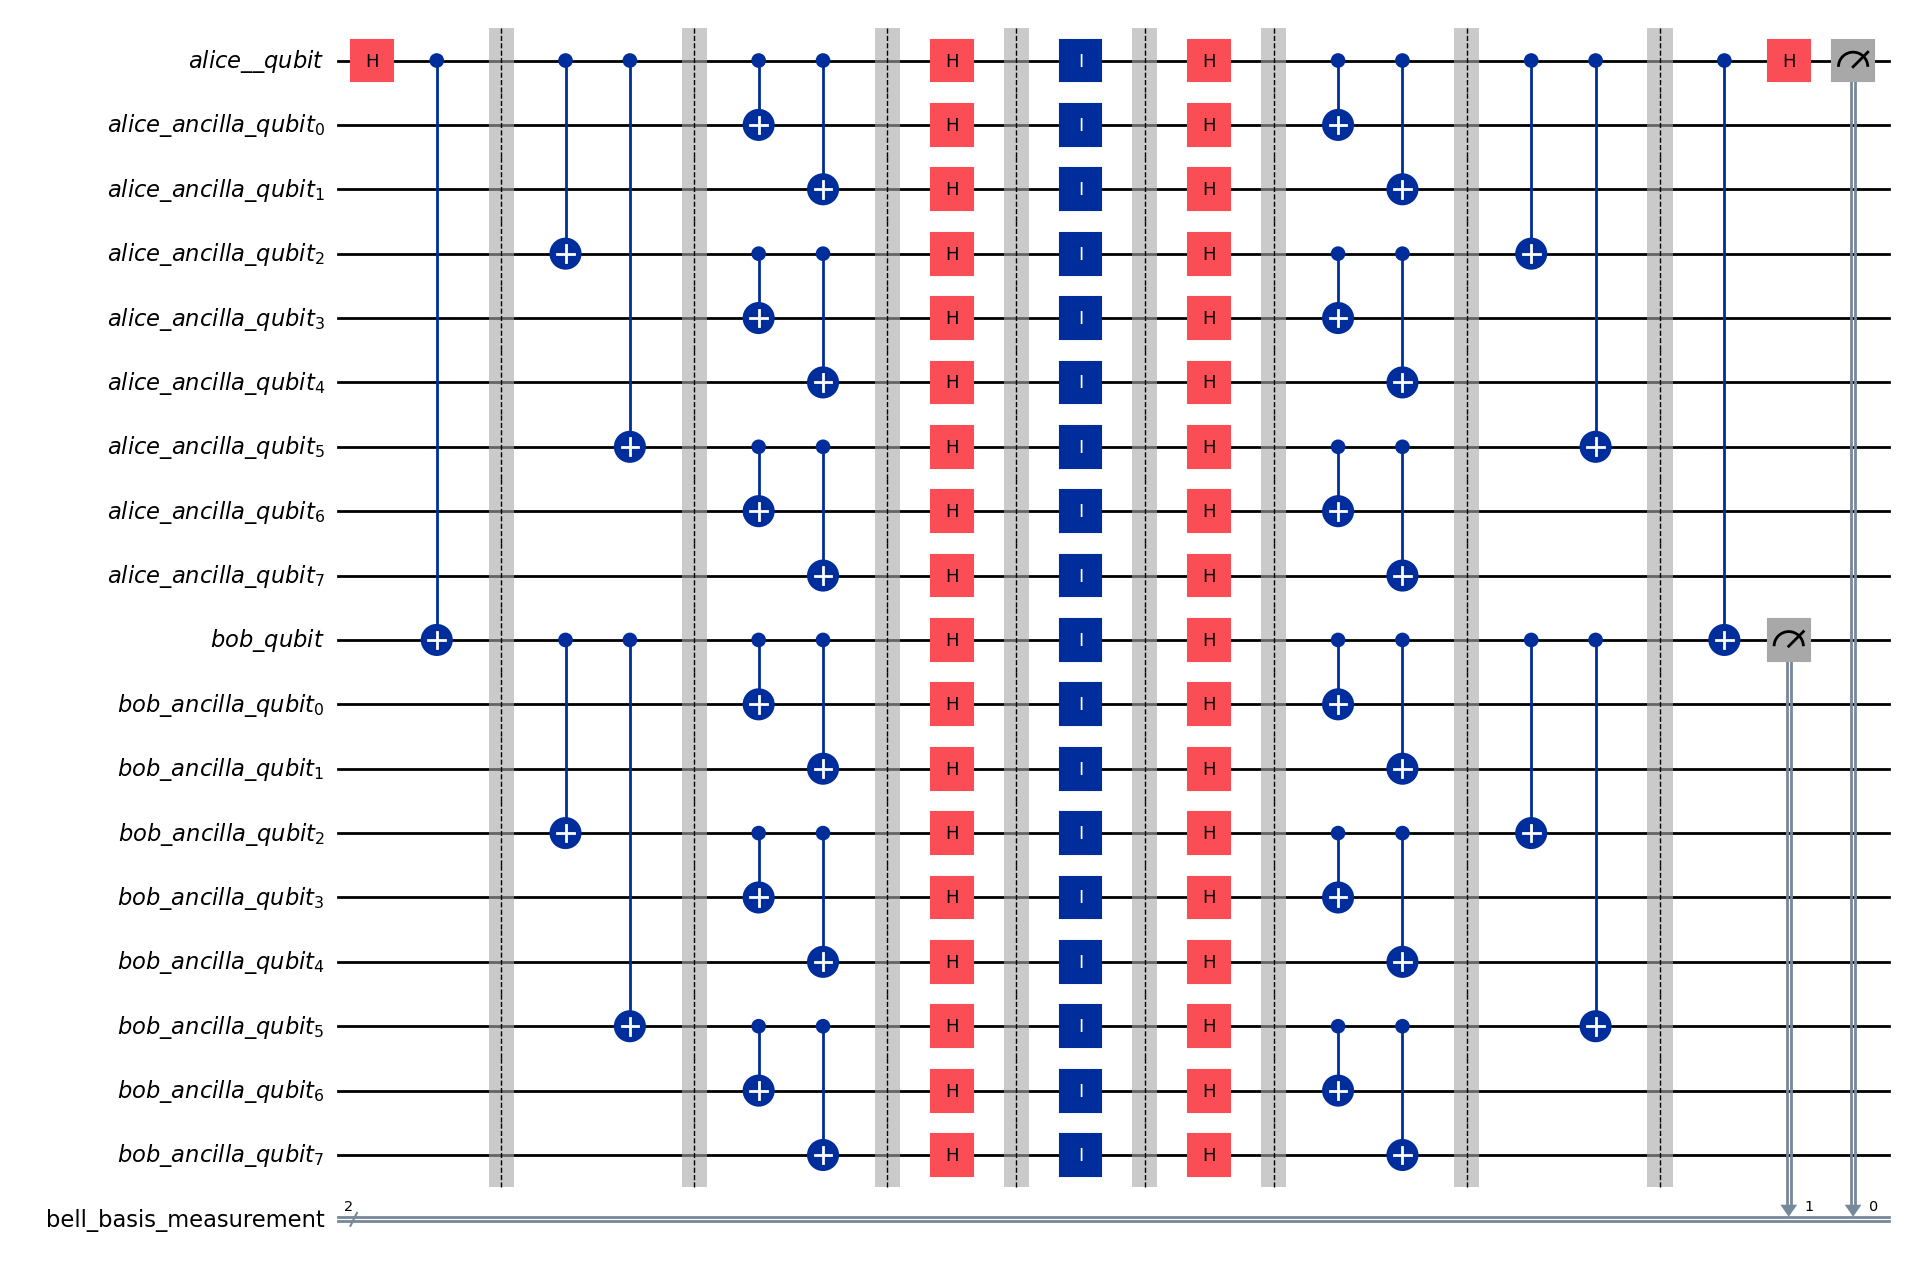

In [3]:
# 9 bit Shor with phase-bit flip interchanged on a bell state

cr = ClassicalRegister(2,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(8, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(8, 'bob_ancilla_qubit')

shor9 = QuantumCircuit(alice,aq1,bob,aq2,cr)

shor9.h(0)
shor9.cx(alice[0],bob[0])
shor9.barrier()

shor9.cx(alice[0],aq1[2])
shor9.cx(alice[0],aq1[5])

shor9.cx(bob[0], aq2[2])
shor9.cx(bob[0], aq2[5])

shor9.barrier()

shor9.cx(alice[0],aq1[0])
shor9.cx(alice[0],aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob[0],aq2[0])
shor9.cx(bob[0],aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.barrier()

shor9.h([0,1,2,3,4,5,6,7,8])
shor9.h([9,10,11,12,13,14,15,16,17])
shor9.barrier()

shor9.id(range(shor9.num_qubits))
shor9.barrier()

shor9.h([0,1,2,3,4,5,6,7,8])
shor9.h([9,10,11,12,13,14,15,16,17])
shor9.barrier()

shor9.cx(alice[0],aq1[0])
shor9.cx(alice[0],aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob[0],aq2[0])
shor9.cx(bob[0],aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])

shor9.barrier()

shor9.cx(alice[0],aq1[2])
shor9.cx(alice[0],aq1[5])

shor9.cx(bob[0], aq2[2])
shor9.cx(bob[0], aq2[5])
shor9.barrier()

shor9.cx(alice[0],bob[0])
shor9.h(0)

shor9.measure([alice[0], bob[0]],cr)
shor9.draw(output='mpl')

In [4]:
shor9.draw(output='mpl').savefig("Shor 9 bit Code with bit-flip first.png",dpi=400,bbox_inches="tight")

In [4]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities = []

for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = Aer.get_backend('qasm_simulator')
    circuit = transpile(shor9, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(9):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 10 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00']
    fidelities.append(fidelity)

{'00': 300.0}
{'10': 0.2, '00': 294.3, '11': 0.3, '01': 5.2}
{'10': 0.9, '00': 280.3, '11': 1.2, '01': 17.6}
{'10': 1.2, '00': 266.8, '11': 1.6, '01': 30.4}
{'10': 4.3, '00': 240.2, '01': 50.6, '11': 4.9}
{'10': 6.0, '00': 214.1, '01': 73.7, '11': 6.2}
{'10': 8.9, '00': 193.7, '01': 89.2, '11': 8.2}
{'10': 10.5, '00': 169.3, '01': 108.6, '11': 11.6}
{'10': 14.1, '00': 164.0, '01': 107.8, '11': 14.1}
{'10': 18.1, '00': 147.7, '01': 116.8, '11': 17.4}
{'10': 23.3, '00': 132.1, '01': 124.1, '11': 20.5}
{'10': 26.9, '00': 127.5, '01': 119.6, '11': 26.0}
{'10': 30.2, '00': 121.5, '01': 117.1, '11': 31.2}
{'10': 36.6, '00': 113.0, '01': 111.7, '11': 38.7}
{'10': 38.3, '00': 111.8, '01': 113.5, '11': 36.4}
{'10': 44.4, '00': 108.1, '01': 104.7, '11': 42.8}
{'10': 48.9, '00': 101.8, '01': 102.6, '11': 46.7}
{'10': 51.2, '00': 93.5, '01': 101.1, '11': 54.2}
{'10': 55.5, '00': 92.3, '01': 93.2, '11': 59.0}
{'10': 60.7, '00': 86.5, '01': 91.6, '11': 61.2}
{'10': 65.2, '00': 84.2, '01': 83.2, '11'

In [7]:
print(fidelities)

[1.0, 0.981, 0.9343333333333333, 0.8893333333333334, 0.8006666666666666, 0.7136666666666667, 0.6456666666666666, 0.5643333333333334, 0.5466666666666666, 0.4923333333333333, 0.4403333333333333, 0.425, 0.405, 0.37666666666666665, 0.37266666666666665, 0.36033333333333334, 0.3393333333333333, 0.31166666666666665, 0.30766666666666664, 0.28833333333333333, 0.2806666666666667, 0.2693333333333333, 0.26766666666666666, 0.25766666666666665, 0.2553333333333333, 0.25166666666666665, 0.24333333333333335, 0.2596666666666667, 0.264, 0.2743333333333333]


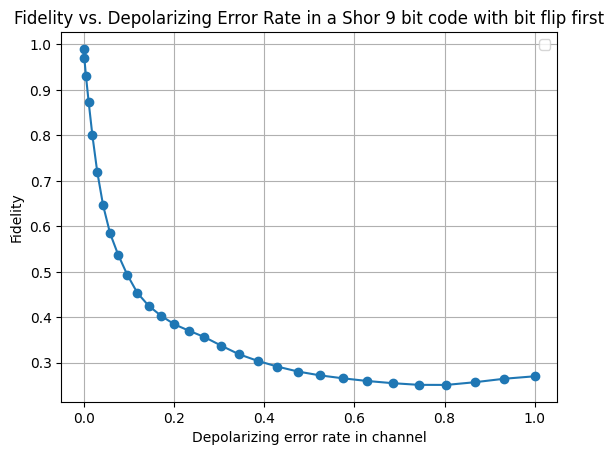

In [6]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 9 bit code with bit flip first')
grid()
legend()

In [ ]:
shor9.draw(output='mpl').savefig("/kaggle/working/Shor9 with interchanging bit and phase flip.png",dpi=400,bbox_inches="tight")